In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/noeli/Desktop/amz_uk_price_prediction_dataset.csv")

In [4]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


hay categorias donde es mas frecuente tener un bestseller

In [19]:
crosstab_result2 = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result2

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [26]:
crosstab_result2['Total'] = crosstab_result2.sum(axis=1)
top10 = crosstab_result2.sort_values(by='Total', ascending=False).head(10)
top10_no_total = top10.drop(columns='Total')


In [20]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result2, method="cramer")

0.1222829439760564

- no tiene una relacion fuerte entre el estatus de superventas y la categoria, ya que el resultado es más cercano a 0 (relación floja) a 1(relación fuerte)

<Axes: xlabel='category'>

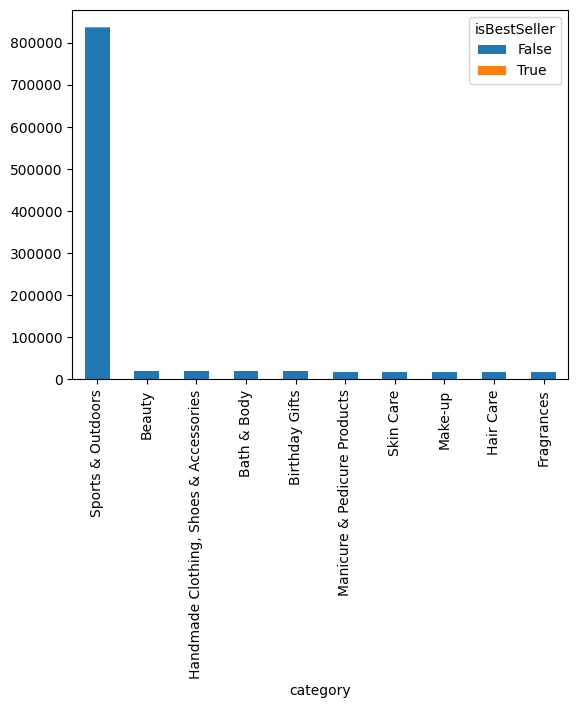

In [27]:
top10_no_total.plot(kind="bar", stacked=True)

#### Ejercicio 2


In [ ]:
Q1 = df['price'].quantile(0.25) 
Q3 = df['price'].quantile(0.75)  
IQR = Q3 - Q1                   


In [29]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [30]:
df_sin_outliers = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]


In [32]:
top20_categories = df_sin_outliers['category'].value_counts().head(20).index

In [33]:
df_top20 = df_sin_outliers[df_sin_outliers['category'].isin(top20_categories)]


C:\Users\noeli\AppData\Local\Temp\ipykernel_29432\745227257.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top20, x='price', y='category', palette="coolwarm")


<Axes: xlabel='price', ylabel='category'>

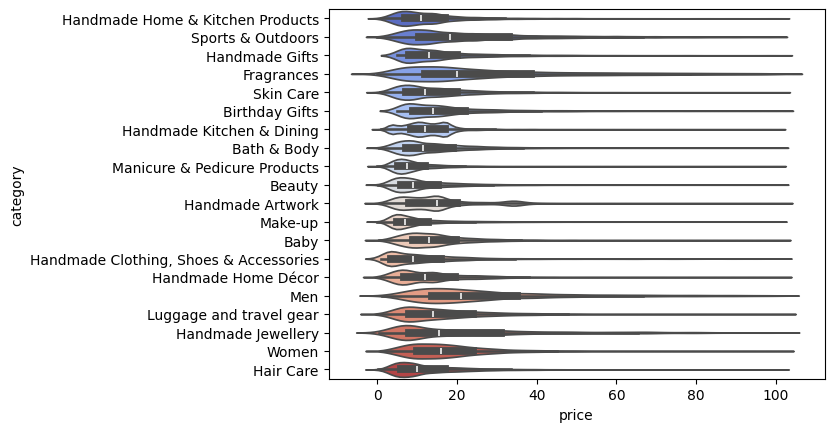

In [59]:
sns.violinplot(data=df_top20, x='price', y='category', palette="coolwarm")

In [55]:
media_precio_categoria = (
    df.groupby('category')['price']
      .median()
      .reset_index()
      .sort_values(by='price', ascending=False)
)
media_precio_categoria

,category,price
165,Laptops,1042.725
75,Desktop PCs,810.400
260,Snowboards,366.725
134,Home Audio Record Players,326.080
0,3D Printers,319.000
...,...,...
4,Adapters,7.050
176,Make-up,7.000
246,Signs & Plaques,6.990
8,Arts & Crafts,5.990


##### - El precio promedio mas alto es la categoria de Laptops, seguida de 3D printers. 

In [62]:
top10_category = df['category'].value_counts().head(10).reset_index()
top10_category

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
5,Manicure & Pedicure Products,18940
6,Skin Care,18769
7,Make-up,18756
8,Hair Care,18735
9,Fragrances,18564


In [63]:
top10_category2 = list(df['category'].value_counts().head(10).index)


In [64]:
top10_avg_price = (
    df[df['category'].isin(top10_category2)]
    .groupby('category')['price']
    .mean()
    .reset_index()
)
top10_avg_price

,category,price
0,Bath & Body,15.042266
1,Beauty,13.222322
2,Birthday Gifts,26.585166
3,Fragrances,36.202865
4,Hair Care,14.326030
5,"Handmade Clothing, Shoes & Accessories",16.865767
6,Make-up,10.895356
7,Manicure & Pedicure Products,10.521108
8,Skin Care,16.340926
9,Sports & Outdoors,125.769814


C:\Users\noeli\AppData\Local\Temp\ipykernel_29432\4152370303.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_avg_price, x='price', y='category', palette="coolwarm")


<Axes: xlabel='price', ylabel='category'>

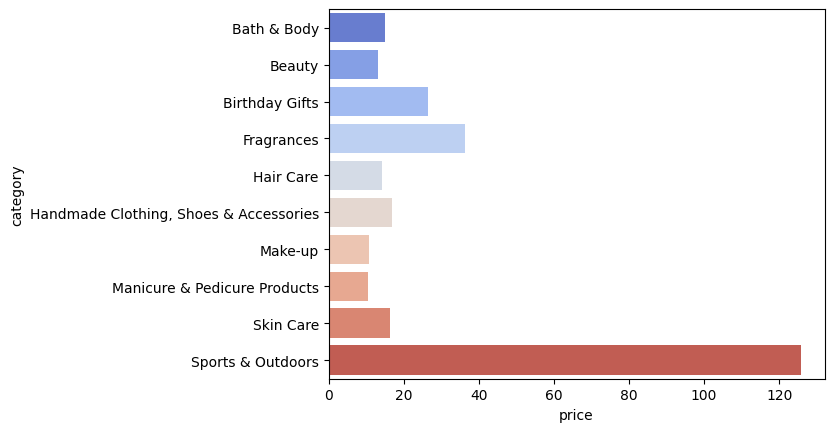

In [65]:
sns.barplot(data=top10_avg_price, x='price', y='category', palette="coolwarm")

In [52]:
mean = df.groupby('category')['price'].mean().reset_index()
mean

,category,price
0,3D Printers,1018.036129
1,3D Printing & Scanning,99.909599
2,Abrasive & Finishing Products,15.801760
3,Action Cameras,135.418598
4,Adapters,8.750197
...,...,...
291,Wind Instruments,391.590480
292,Window Treatments,20.668326
293,Women,22.262394
294,Women's Sports & Outdoor Shoes,73.332266


In [53]:
mean.sort_values(by='price', ascending=False, inplace=True)

In [54]:
mean

,category,price
165,Laptops,1087.987827
0,3D Printers,1018.036129
75,Desktop PCs,926.816064
141,Home Office Furniture,622.135898
278,Test & Measurement,559.382973
...,...,...
22,Bedding Accessories,8.835220
4,Adapters,8.750197
246,Signs & Plaques,8.275136
8,Arts & Crafts,8.182523


#### - El precio promedio más alto lo tienen los Laptops, igual que la mediana

In [66]:
top10_category

,category,count
0,Sports & Outdoors,836265
1,Beauty,19312
2,"Handmade Clothing, Shoes & Accessories",19229
3,Bath & Body,19092
4,Birthday Gifts,18978
5,Manicure & Pedicure Products,18940
6,Skin Care,18769
7,Make-up,18756
8,Hair Care,18735
9,Fragrances,18564


In [79]:
df_top10 = df[df['category'].isin(top10_category)]

C:\Users\noeli\AppData\Local\Temp\ipykernel_29432\2622722678.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top10, x='stars', y='category', palette="coolwarm")


<Axes: xlabel='stars', ylabel='category'>

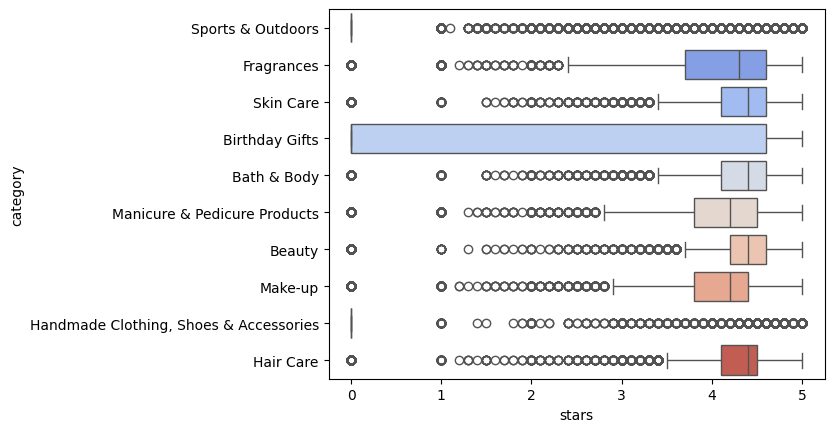

In [81]:
sns.boxplot(data=df_top10, x='stars', y='category', palette="coolwarm")

In [83]:
mean_rating = df.groupby('category')['stars'].mean().reset_index()
mean_rating

,category,stars
0,3D Printers,2.643145
1,3D Printing & Scanning,0.148267
2,Abrasive & Finishing Products,4.125200
3,Action Cameras,1.281615
4,Adapters,4.142520
...,...,...
291,Wind Instruments,2.026400
292,Window Treatments,4.107950
293,Women,4.169446
294,Women's Sports & Outdoor Shoes,3.937570


In [88]:
mean_rating.sort_values(by='stars', ascending=False, inplace=True)
mean_rating

,category,stars
174,Luxury Food & Drink,4.547570
109,Grocery,4.469061
164,Laptop Accessories,4.449600
126,Health & Personal Care,4.439649
8,Arts & Crafts,4.432663
...,...,...
202,Motorbike Instruments,0.166507
1,3D Printing & Scanning,0.148267
201,"Motorbike Handlebars, Controls & Grips",0.125466
198,Motorbike Electrical & Batteries,0.097857


#### - La categoria que más valoración tiene es la Luxury Food & Drink

### Ejercicio 3

In [91]:
crosstab_result3 = pd.crosstab(df['price'], df['stars'])

crosstab_result3

stars,0.0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,...,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
price,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,5,7,2,0,1
0.01,613,5,0,0,0,0,1,0,0,0,...,4,2,2,0,0,5,1,1,0,18
0.02,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.04,12,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22933.42,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23482.73,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24674.59,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result3, method="cramer")

0.15350264705482006

#### - Tienen relacion pero no es signficativa. no tiene porque valer más para tener mejor valoracion

<Axes: xlabel='stars', ylabel='price'>

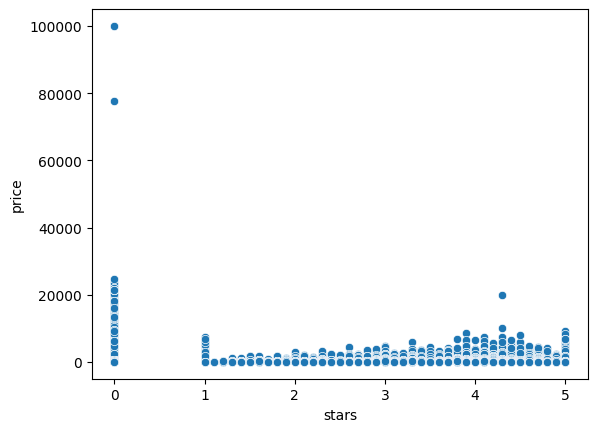

In [96]:
sns.scatterplot(data=df, x='stars', y='price')

#### podemos observar que si hay un crecimiento, aunque sea pequeño, en funcion de a cuanto mas precio mas valoración. es lo que hemos hablado antes, la relacion la tiene pero no es suficiente para poder destacarla. tambien podemos comprobar que los productos más caros suelen tener menos valoracion

In [97]:
numerical_df = df.select_dtypes(include='number')


In [98]:
correlation_matrix = numerical_df.corr()


<Axes: >

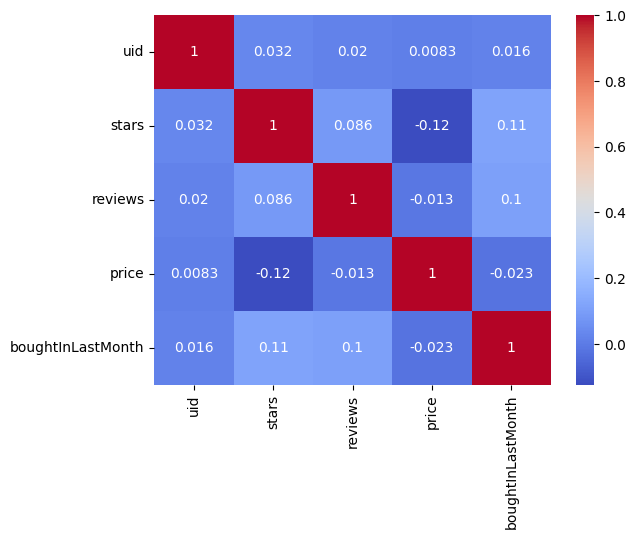

In [99]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

In [100]:
prices = df['price']

In [102]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

((array([-5.00202766, -4.82829967, -4.73454367, ...,  4.73454367,
          4.82829967,  5.00202766], shape=(2443651,)),
  array([     0.  ,      0.  ,      0.  , ...,  24674.59,  77752.  ,
         100000.  ], shape=(2443651,))),
 (np.float64(157.6532194152782),
  np.float64(89.24380943923667),
  np.float64(0.4561598770967806)))

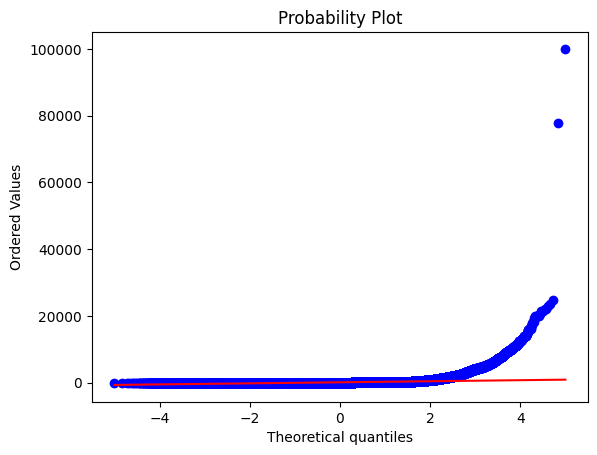

In [103]:
stats.probplot(prices, dist="norm", plot=plt)

#### No tiene una distribución normal